In [118]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd


In [119]:
dataset = pd.read_csv('Task2 - dataset - dog_breeds.csv', header = 0).values # read Excel file

In [120]:
def initialise_centroids(dataset, k): 
    np.random.seed(0) 
    centroids = np.zeros([k, 4])  # create an array to store centroids
    data_len = len(dataset) 

    for i in range(k):
        index  = np.random.randint(0, data_len) # pick a random number from data_len
        centroids[i] = dataset[index] 

    return centroids


In [121]:
# test
# initialise_centroids(dataset, 4)

In [122]:
def compute_euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2) # calculate the root square(distance between point1 and point2)

In [123]:
# test
# compute_euclidean_distance(5, 3) 

In [124]:
def scatter_1(centroids, clusters, k):

    colors = ['red', 'purple' , 'gray', 'orange', 'blue', 'green', 'yellow', 'blue'] # add the colors 
    plt.figure(figsize = (6, 4))   # create a new figure
    area = (20) ** 2 #the figure area 
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6) #extract the height and tail data in the cluster 
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200) #plot centroids
    plt.xlabel("Height")
    plt.ylabel("Tail Length")
    
    


In [125]:
def scatter_2(centroids, clusters, k):
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']# set the color set
    plt.figure(figsize = (6, 4))  # create a new figure
    area = (20) ** 2 # set the figure area
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[2], c=colors[i % k], alpha=0.6)  #get the data belogs to height and leg length in cluster         
        plt.scatter(centroids[i][0], centroids[i][2], c='black', s=200) #plot centroids   
    plt.xlabel("Height")
    plt.ylabel("Leg Length")
    

In [126]:
def plot_line(objValue, itr):
    plt.figure();
    plt.semilogy(range(0,itr), objValue) # plot the line with y value equals to objective function values and x equals to iteration
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Values")
    plt.show()

In [127]:
def recalClusters(dataset, centroids, k):
    clusters = {}# create an empty cluster
    
    for i in range(k):
        clusters[i] = [] # set k groups in clusters
    for data in dataset:
        euDist = []# Set up list of euclidian distance
        for j in range(k):
            euDist.append(compute_euclidean_distance(data, centroids[j]))# append the European distance between data and each centroids
        
        clusters[np.argmin(euDist)].append(data)# track which cluster this data belongs to
    return clusters    


def recal_centroids(centroids, clusters, k):
    
    for i in range(k):
        centroids[i] = np.mean(clusters[i], axis = 0)# determind the avr points where the clusters number is k
    return centroids

In [128]:
def ObjFunction(clusters,centroids,k):
    sumDist = 0 # initial a number for record sum distance
    for i in range(k):
        for j in clusters[i]:
            sumDist += compute_euclidean_distance(j,centroids[i]) # calculate the eu distance in clusters to their centroids
    return sumDist

In [136]:
def kmeans(dataset, k):
    centroids = initialise_centroids(dataset, k) #call initialise_centroids func and save it in variable 
    count = 0 # the number of itrations 
    Flag = False # bool to control the loop 
    objValue = [] # create an array to store the sum distance in each loop
    
    
    while Flag == False: # 
        centroidstemp = np.array(centroids) 
        clusters = recalClusters(dataset, centroids, k) # based on the cetroids add the data to the number of cluster 
        
        objValue.append(ObjFunction(clusters,centroids,k)) # calculate the distance and save it
        centroids = recal_centroids(centroids, clusters, k) #recalculate the centroids
        if (centroidstemp == centroids).all(): # judge whether the centroids have change
            Flag = True # if true, exit the loop
        count = count+1
    scatter_1(centroids, clusters, k) # plot the scatter plot for Height and tail length
    scatter_2(centroids, clusters, k) # plot the scatter plot for Height and leg length
    plot_line(objValue, count) # plot the line plot for objective values in each iteration
    return centroids, clusters

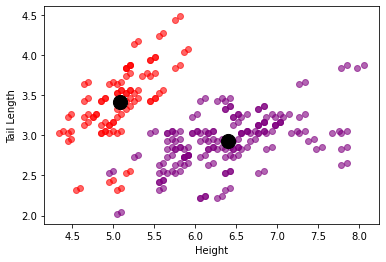

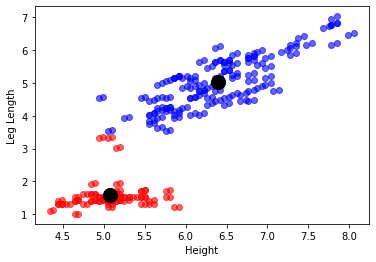

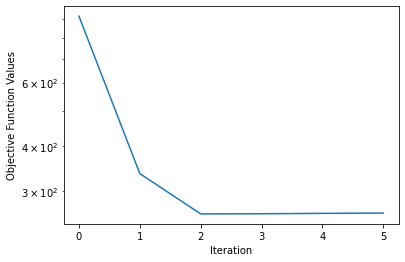

In [130]:
# when the clusters are equals to  2
k = 2 
centroids, clusters = kmeans(dataset, k)

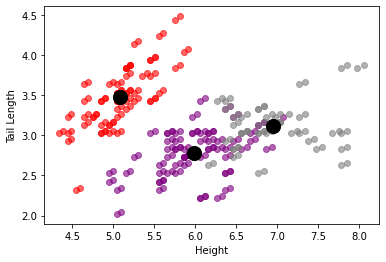

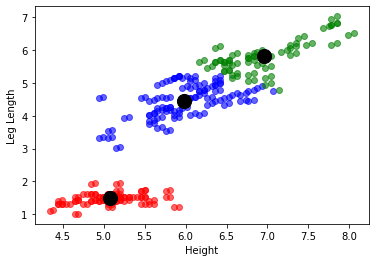

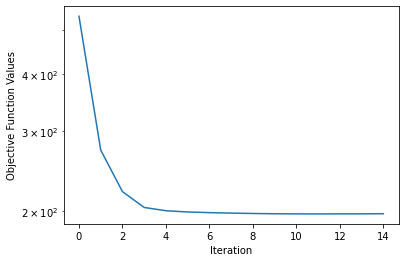

In [131]:
# when the clusters are equals to  4
k = 3
centroids, clusters = kmeans(dataset, k)

In [132]:
# np.random.seed(30)
# np.random.randint(low = 1, high = 10, size = 5)

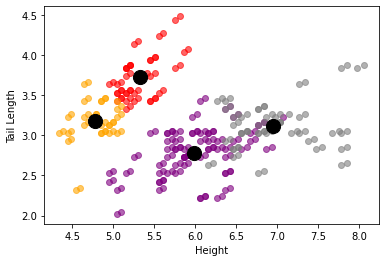

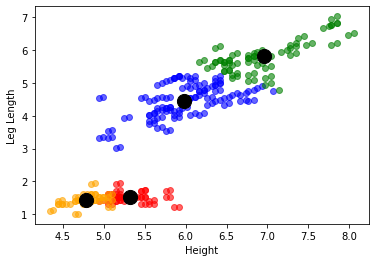

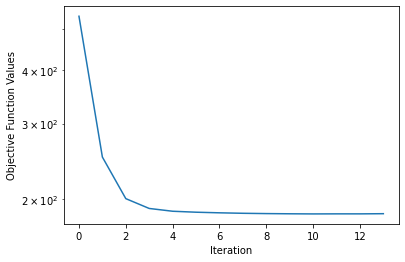

In [133]:
# when the clusters are equals to  4
k = 4 
centroids, clusters = kmeans(dataset, k)